In [1]:
# fundamentals
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns

# plotting libraries and setup
import matplotlib.pyplot as plt


In [2]:
# paths (must mount volume smb://nrel.gov/shared/wind/WindWeb/MetData/135mData/)
towerID = 'M5'
datapath = '../example_data/'.format(towerID)
fPaths = os.listdir(datapath)
data = pd.read_csv(os.path.join(datapath,fPaths[9]))

In [3]:
data.set_index(pd.DatetimeIndex(data['Date']), inplace=True)
data.drop('Date', axis=1, inplace=True)

In [4]:
temp = data[['Speed (cup_ 87 m)', 'Direction (Vane_ 87 m)']]
spdr = pd.DataFrame(data =temp.values, columns=['speed', 'direction'], index=temp.index)
spdr.dropna(how='any', inplace=True)

In [5]:
nbins = 25
bins = np.linspace(0, nbins, nbins+1)
spdr['speed bins'] = pd.cut(spdr['speed'], bins=bins)

nbins = 36
bins = np.linspace(0, 360, nbins+1)
spdr['direction bins'] = pd.cut(spdr['direction'], bins=bins)

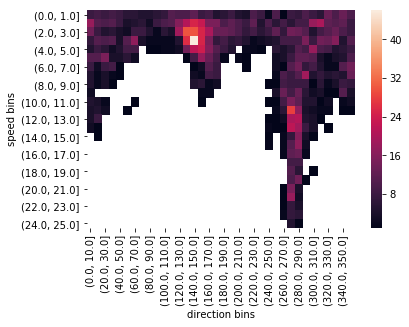

In [6]:
plotdat = spdr.groupby(['speed bins', 'direction bins']).count()
plotdat = plotdat['speed'].unstack(fill_value=0)
sns.heatmap(plotdat, annot=False)
